<h2><u>Question-4: Principal Component Analysis (PCA)</u></h2>

<h3><b>4.1 - Explained Variance and Lossy Reconstruction
</b></h3>



In [ ]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
def pca(x, num_components):
    x_mean = np.mean(x_batch, axis=0)
    x = x - x_mean
    covar_matrix = np.matmul(x.T , x)
    eigenvalues, eigenvectors = np.linalg.eigh(covar_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]

    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]
    principal_components = eigenvectors[:, :num_components]
    x_pca = np.dot(x, principal_components)
    return x_pca, principal_components, eigenvectors, eigenvalues, x_mean

def reconstruct_images(x_pca, components, mean):
    return np.dot(x_pca, components.T) + mean

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_set = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_set = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

x_train = train_set.data.numpy().reshape(len(train_set), -1) / 255.0 # flatten the images
x_test = test_set.data.numpy().reshape(len(test_set), -1) / 255.0

y_train = train_set.targets.numpy()
y_test = test_set.targets.numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


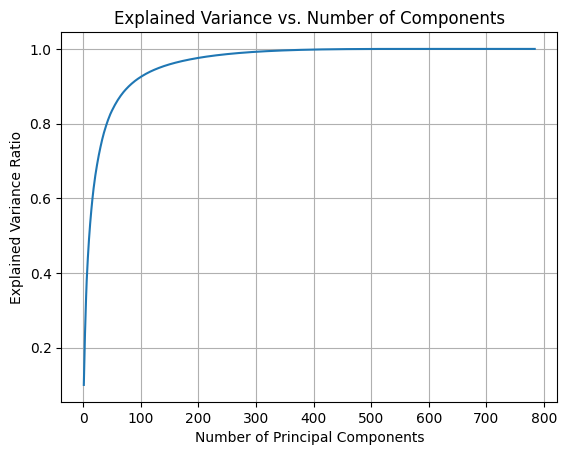

In [ ]:
indices = np.hstack([np.random.choice(np.where(y_train == i)[0], 1000 // 10, replace=False) for i in range(10)])
x_batch = x_train[indices]
y_batch = y_train[indices]

dimensions = [500, 300, 150, 30]
for d in dimensions:
    x_pca, components, eigenvector, eigenvalues, mean = pca(x_batch, d)
    x_reconstruct = reconstruct_images(x_pca, components, mean)

explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)
plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

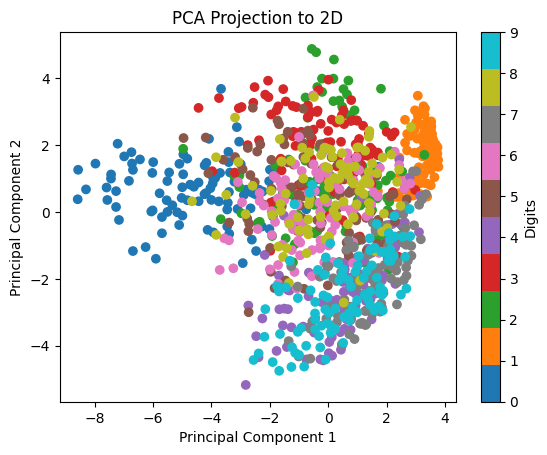

In [ ]:
x_pca, components, eigenvector, eigenvalues, mean = pca(x_batch, 2)

plt.figure()
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_batch, cmap='tab10')
plt.colorbar(scatter, label="Digits")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection to 2D")
plt.show()

<h4><u>Observations</u></h4>



*   The digits do appear to form distinct clusters, but there is significant overlap too.
*   There is a lot of overlap for 9, 8, 7 etc
* Thus, while PCA has managed to reduce the number of dimensions - these two principal components are not enough to capture the whole data.



In [ ]:
indices = np.random.choice(1000, 5, replace=False)
original = x_batch[indices]

dimensions = [500, 300, 150, 30]
fig, axes = plt.subplots(5, 5, figsize=(10, 8))
for i, img in enumerate(original):
    axes[0, i].imshow(img.reshape(28, 28), cmap='gray')
    axes[0, i].axis("off")
    axes[0, i].set_title("Original")

for i, d in enumerate(dimensions):
    x_pca, components, eigenvector, eigenvalues, mean = pca(x_batch, d)
    x_reconstruct = reconstruct_images(x_pca, components, mean)
    # print(x_reconstruct.shape)
    x_reconstruct = x_reconstruct[indices]
    for j, img in enumerate(x_reconstruct):
        axes[i + 1, j].imshow(img.reshape(28, 28), cmap='gray')
        axes[i + 1, j].axis("off")
        axes[i + 1, j].set_title(f"{d} PCs")

plt.suptitle("Reconstructed Images after PCA Projection")
plt.show()

<h4><u>Observations</u></h4>


*   We observe that the images recontructed from 500 and 300 PC's closely resemble the original image and does not have a lot of information loss.
*   For the 150 and 30 PC images, we notice that there is significant information loss, mostly in the 30 PC images.
* This suggests that while reducing the dimensions from 784 to 300 will not throw away important information, reducing to very low dimensions degrades quality.



<h3><b>4.2 - Classification Performance with vs without dimensionality reduction
</b></h3>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
indices = np.random.choice(len(x_train), 40000, replace=False)
x_train, y_train = x_train[indices], y_train[indices]
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=50, random_state=42, verbose=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Iteration 1, loss = 0.47102685
Iteration 2, loss = 0.18113690
Iteration 3, loss = 0.13085045
Iteration 4, loss = 0.09672239
Iteration 5, loss = 0.07739784
Iteration 6, loss = 0.06338827
Iteration 7, loss = 0.05120996
Iteration 8, loss = 0.04154237
Iteration 9, loss = 0.03630182
Iteration 10, loss = 0.02771738
Iteration 11, loss = 0.02246616
Iteration 12, loss = 0.01900392
Iteration 13, loss = 0.01619819
Iteration 14, loss = 0.01456478
Iteration 15, loss = 0.01136602
Iteration 16, loss = 0.00958070
Iteration 17, loss = 0.00799518
Iteration 18, loss = 0.00581358
Iteration 19, loss = 0.00428274
Iteration 20, loss = 0.00334395
Iteration 21, loss = 0.00325389
Iteration 22, loss = 0.00710814
Iteration 23, loss = 0.02056479
Iteration 24, loss = 0.00735074
Iteration 25, loss = 0.00505850
Iteration 26, loss = 0.00175547
Iteration 27, loss = 0.00109252
Iteration 28, loss = 0.00083379
Iteration 29, loss = 0.00074535
Iteration 30, loss = 0.00072829
Iteration 31, loss = 0.00066931
Iteration 32, los

Iteration 1, loss = 0.63384969
Iteration 2, loss = 0.16695114
Iteration 3, loss = 0.10463292
Iteration 4, loss = 0.06883839
Iteration 5, loss = 0.04526807
Iteration 6, loss = 0.03007290
Iteration 7, loss = 0.01901155
Iteration 8, loss = 0.01230331
Iteration 9, loss = 0.00772379
Iteration 10, loss = 0.00513082
Iteration 11, loss = 0.00367603
Iteration 12, loss = 0.00273329
Iteration 13, loss = 0.00210498
Iteration 14, loss = 0.00169351
Iteration 15, loss = 0.00139468
Iteration 16, loss = 0.00117821
Iteration 17, loss = 0.00099834
Iteration 18, loss = 0.00086311
Iteration 19, loss = 0.00075816
Iteration 20, loss = 0.00067382
Iteration 21, loss = 0.00060575
Iteration 22, loss = 0.00054843
Iteration 23, loss = 0.00050349
Iteration 24, loss = 0.00046448
Iteration 25, loss = 0.00043227
Iteration 26, loss = 0.00040507
Iteration 27, loss = 0.00038140
Iteration 28, loss = 0.00036217
Iteration 29, loss = 0.00034481
Iteration 30, loss = 0.00033118
Training loss did not improve more than tol=0.000

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


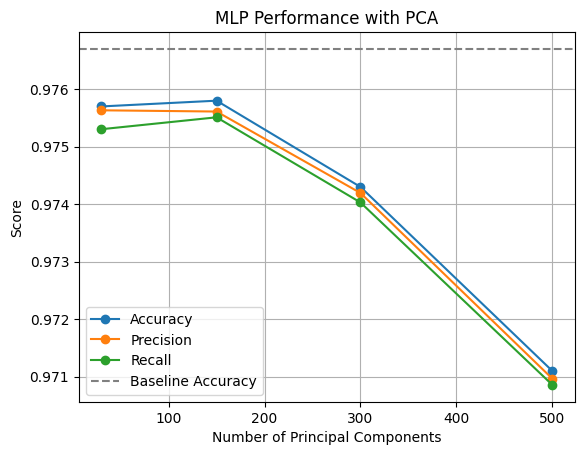

In [ ]:
results = {}
results[0] = (accuracy, precision, recall)

for d in dimensions:
    x_train_pca, components, eigenvector, eigenvalues, mean = pca(x_train, d)
    x_test_pca = np.dot((x_test - mean), components)

    mlp_pca = MLPClassifier((128, 64), activation='relu', solver='adam', max_iter=50, random_state=42, verbose=True)
    mlp_pca.fit(x_train_pca, y_train)
    y_pred_pca = mlp_pca.predict(x_test_pca)

    acc_pca = accuracy_score(y_test, y_pred_pca)
    prec_pca = precision_score(y_test, y_pred_pca, average="macro")
    rec_pca = recall_score(y_test, y_pred_pca, average="macro")

    results[d] = (acc_pca, prec_pca, rec_pca)
    print(f"PCA-{d} - Accuracy: {acc_pca:.4f}, Precision: {prec_pca:.4f}, Recall: {rec_pca:.4f}")

plt.figure()
plt.plot(dimensions, [results[d][0] for d in dimensions], label="Accuracy", marker="o")
plt.plot(dimensions, [results[d][1] for d in dimensions], label="Precision", marker="o")
plt.plot(dimensions, [results[d][2] for d in dimensions], label="Recall", marker="o")
plt.axhline(y=results[0][0], linestyle="--", color="gray", label="Baseline Accuracy")
plt.xlabel("Number of Principal Components")
plt.ylabel("Score")
plt.title("MLP Performance with PCA")
plt.legend()
plt.grid()
plt.show()

<h4><u>Observations</u></h4>


*   From the graph we observe that surprisingly, the best performance is from the model is using the 150 PC images.
*   This could be explained by the fact that 150 dimensions are enough for the MLP to cpature and model the data accurately.
* As the number of dimensions increases to 500, the performance degrades. This could be attributed to the curse of dimensionality - increasing the number of dimensions introduces irrelevant or noisy features, which can hurt model generalization.
* Thus, more number of dimensions could lead to overfitting and thus, poor model performance.

<h4><u>Report</u></h4>

1. PCA helps mitigate the curse of dimensionality because like we saw, it helps the models generalise better using the lower-dimension representations of the data. Thus, by discarding the less important principal components, PCA can help retain only the most important aspects of the data. PCA is also useful in algorithms that are computationally expensive - because we can now work with fewer dimensions.

2. The main drawback of PCA is that it is a linear algorithm and thus can be used only with data following a linear trend. However, most high dimensional data in real life does not follow a linear trend. Another assumption that PCA makes is that the highest variance direction will always be a discrimative decision, but this is not necessarily true for all data.

3. An example of where this example would fail is often encountered in facial recognition systems. Say we have images of different faces in different lightings, and the images vary greatly in brightness. When applying PCA, the brightness might be considered the most important component, because of its high variance, disregarding the actual important feature - the faces. Thus, because PCA favours high variance it could lead to choosing features which are not very important.
